In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("DataSets/train.csv")

In [15]:
cond_good = data[data["condition"] == "good"]
cond_zero = data[data["condition"] == "zero condition"]

In [45]:
def categorical_col_analysis(df,col):

    # Categories and appearances
    values_dict = df[col].value_counts().to_dict()
    print("Column value counts")
    print(df[col].value_counts(),"\n")
    labels = []
    values = []
    for key, value in values_dict.items():
        labels.append(key)
        values.append(value)

    # Pieplot and barplot
    plt.figure(figsize=(12, 4))

    plt.subplot(121)
    plt.title("Pieplot of {0}".format(col))
    plt.pie(values, labels=labels, autopct='%1.1f%%')
    plt.subplot(122)
    sns.barplot(x=labels, y=values).set_title("Barplot of {0}".format(col))
    plt.subplots_adjust(wspace=1)
    plt.show()
    print('======================================================================')
    
def cat_num(df, cat_col, num_col):

    labels = df[cat_col].unique()
    print(num_col + ' dependence on', cat_col)
    for label in labels:
        print('\nLabel: ', label, '\n')
        print(df[num_col][df[cat_col] == label].describe())

    values = pd.concat([df[num_col], df[cat_col]], axis=1)
    fig = sns.boxplot(x=cat_col, y=num_col, data=values)
    plt.show()
    print('======================================================================')


Column value counts
newly repaired    2404
good              1426
zero condition     346
Name: condition, dtype: int64 



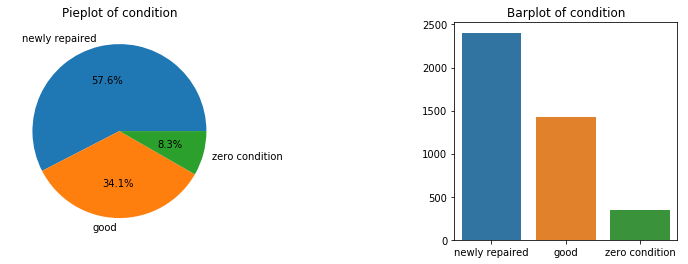

In [40]:
categorical_col_analysis(df=data,col="condition")

price dependence on condition

Label:  newly repaired 

count      2404.000000
mean      95580.098170
std       57234.785403
min       25000.000000
25%       57000.000000
50%       79000.000000
75%      119250.000000
max      550000.000000
Name: price, dtype: float64

Label:  good 

count      1426.000000
mean      69328.532258
std       40688.047532
min       18500.000000
25%       43000.000000
50%       56000.000000
75%       80000.000000
max      340000.000000
Name: price, dtype: float64

Label:  zero condition 

count       346.000000
mean      92327.023121
std       54914.337502
min       26000.000000
25%       54000.000000
50%       77000.000000
75%      115375.000000
max      360000.000000
Name: price, dtype: float64


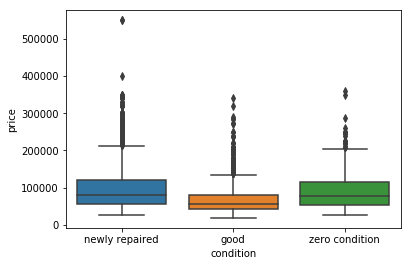

In [46]:
cat_num(df=data,cat_col="condition",num_col="price")

In [48]:
def classification_with_cat(df, num_col1, num_col2, cat_col):


    unique_categorical = df[cat_col].unique()
    sccaters = []

    for i,val in enumerate(unique_categorical):
        x_part = df[num_col1][df[cat_col] == val]
        y_part = df[num_col2][df[cat_col] == val]
        sccaters.append(plt.scatter(x=x_part, y=y_part))

    plt.legend(sccaters, unique_categorical)
    plt.xlabel(num_col1)
    plt.ylabel(num_col2)
    plt.show()

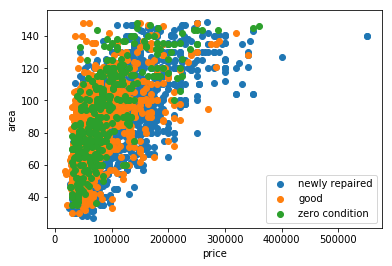

In [49]:
classification_with_cat(df=data,num_col1="price",num_col2="area",cat_col="condition")